In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import _pydecimal
from _pydecimal import Context, MAX_EMAX, MAX_PREC, MIN_EMIN

# Аналитическое решение линейной задачи

In [2]:
def fu(x):
    if x<=-0.5:
        return 0
    if (x>-0.5) and (x<=-0.25):
        return 4*x+2
    if (x>-0.25):
        return 1

In [3]:
def lin(h, tau):
    xmin = -1
    xmax = 1
    x= [] 
    u= []
    for i in range(-int(1/h), int(1/h)+1):
        x.append(i*h)
    for i in range(len(x)):
        u.append(fu(x[i]))
    return u


# Аналитическое решение нелинейной задачи

In [4]:
def fun(x):
    if x<=-3/8:
        return 0
    if x>-3/8:
        return 1



In [5]:
def nelin(h, tau):
    xmin = -1
    xmax = 1
    x= [] 
    u=[]
    for i in range(-int(1/h), int(1/h)+1):
        x.append(i*h)
    
    for i in range(len(x)):
        u.append(fun(x[i]))
        
    return u  


# Явная схема для линейной задачи

In [6]:
def lay_zero(x):
    if x <= 0:
        return 0
    elif x > 0.25:
        return 1
    else:
        return 4*x
    

In [7]:
def expl_scheme(h, tau):
    
    xmin = -1
    xmax = 1
    tmax = 1
    tmin = 0

    n=int((tmax-tmin)/tau)
    m=int(((xmax-xmin)/h))*2
    
    x=[]
    for i in range(-int(2/h), int(2/h)+1):
        x.append(i*h)
    m=len(x)

    prev = [0 for i in range(m)]
    curr = [0 for i in range(m)]
    nex = [0 for i in range(m)]

    
    for i in range(m):
        x[i]=2*xmin+h*i
        prev[i]= lay_zero(x[i])
        
    for i in range(m-1):
        curr[i]= prev[i]+tau/(2*h)*(prev[i+1]-prev[i])
        
    for i in range(1,n):   

        for j in range(m-1):
            
            nex[j]=prev[j] +(tau/(2*h)) * (curr[j+1] - curr[j-1])
            #print(nex[j])

        for  j in range(m):
            prev[j]=curr[j]
            curr[j]=nex[j]
    return nex[m//4:3*m//4+1]


# Явная схема для нелинейной задачи

In [8]:
def expl_scheme_(h, tau):
    
    #xmin = Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(-1)
    #xmax = Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(1)
    #tmax = Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(1)
    #tmin = Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(0)

    
    #x = [Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(0) for i in range(m)]

    #prev = [Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(0) for i in range(m)]
    #curr = [Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(0) for i in range(m)]
    #nex = [Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(0) for i in range(m)]
    xmin = -1
    xmax = 1
    tmax = 1
    tmin = 0

    n=int((tmax-tmin)/tau)
    m=int(((xmax-xmin)/h))*2
    
    x=[]
    for i in range(-int(2/h), int(2/h)+1):
        x.append(i*h)
    m=len(x)

    prev = [0 for i in range(m)]
    curr = [0 for i in range(m)]
    nex = [0 for i in range(m)]
    
    for i in range(m):
        x[i]=2*xmin+h*i
        prev[i]= lay_zero(x[i])
        
    for i in range(m-1):
        curr[i]= prev[i]+tau/h*(prev[i+1]**2-prev[i]**2)
        
    for i in range(1,n):   
        #print(i)
        for j in range(m-1):
            
            nex[j]=prev[j] +(tau/(2*h)) * (curr[j+1]**2 - curr[j-1]**2)
            #print(nex[j])

        for  j in range(m):
            prev[j]=curr[j]
            curr[j]=nex[j]
    return nex[m//4:3*m//4+1]


# Неявная схема для линейной задачи

In [88]:
def nonexpl_scheme(h,tau):      
    xmin= -1
    xmax= 1
    tmax= 1
    tmin= 0
    test= -1

    n=int((tmax-tmin)/tau)+1
    x=[]
    for i in range(-int(1/h), int(1/h)+1):
        x.append(i*h)
    
    curr=[0 for i in range(len(x))]
    nex = [0 for i in range(len(x))]

    for i in range(len(x)):
        curr[i] = lay_zero(x[i])

    for i in range(n):
        nex[len(x)-1]=1
        for j in range(len(x)-2,0,-1):
            nex[j]=(2*h*curr[j+1] + (tau - 2*h)*nex[j+1])/tau
        #print(nex)
            
        for j in range(len(x)):
            curr[j]=nex[j]
    
    return nex


# Неявная схема для нелинейной задачи

In [127]:
def nonexpl_scheme_(h,tau):      
    xmin= -1
    xmax= 1
    tmax= 1
    tmin= 0
    test= -1

    n=int((tmax-tmin)/tau)+1
    x=[]
    for i in range(-int(1/h), int(1/h)+1):
        x.append(i*h)
    
    curr=[0 for i in range(len(x))]
    nex = [0 for i in range(len(x))]

    for i in range(len(x)):
        curr[i] = lay_zero(x[i])

    for i in range(n):
        nex[len(x)-1]=1
        for j in range(len(x)-2,0,-1):
            if (nex[j+1]**2 - (2*h/tau)*(nex[j+1] - curr[j])) < 0: 
                nex[j]=0
            else:
                nex[j]=(nex[j+1]**2 - (2*h/tau)*(nex[j+1] - curr[j]))**0.5 
            
            #print(x[j],curr[j])
            
        for j in range(len(x)):
            curr[j]=nex[j]
    return nex


# График

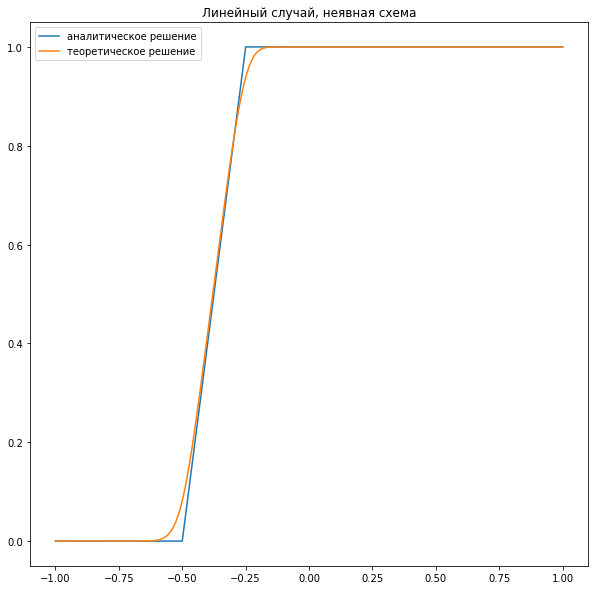

In [146]:
fig, ax = plt.subplots(figsize=(10, 10))


#h=Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(0.01)
#tau=Context(Emin=-MIN_EMIN**100, Emax=MAX_EMAX**100, prec=MAX_PREC**100).create_decimal(0.01)
h=0.001
tau=0.01
coordinate = [] 
for x in range(-int(1/h), int(1/h)+1):
    coordinate.append(x*h)
ax.plot(coordinate, lin(h,tau), label="аналитическое решение")

ax.plot(coordinate, nonexpl_scheme(h, tau), label="теоретическое решение")

ax.set_title('Линейный случай, неявная схема')

ax.legend()
plt.show()

# Погрешности

In [145]:
h = 0.1
tau = 0.1
pogr_nepr = 0.0
sum0=0
sum1=0
pogr_nepr_norm=0
pogr_norm =0
pogr_check =0
x=[]

for i in range(-int(1/h), int(1/h)+1):
    x.append(i*h)

ut = nelin(h,tau)
u = nonexpl_scheme_(h,tau)

for t in range(3):
    h=0.1
    for sh in range(3):
        x=[]
        for i in range(-int(1/h), int(1/h)+1):
            x.append(i*h)
        exc=1
        try:
            ut = nelin(h,tau)
            u = nonexpl_scheme_(h,tau)
        except OverflowError:
            print("nan")
            exc=0
        if exc:
            pogr_nepr = 0.0
            sum0=0
            sum1=0
            pogr_nepr_norm=0
            pogr_norm =0
            pogr_check =0
            for i in range(len(x)):
                check = abs(u[i]-ut[i])
                sum0 += h*check
                sum1 += h*abs(u[i])
                if check>pogr_nepr:
                    pogr_nepr = check
                check_1 = u[i]
                if check_1>=pogr_check:
                    pogr_check = u[i]
                if sum1!=0:
                    pogr_norm = sum0/sum1
                if pogr_check!=0:
                    pogr_nepr_norm = pogr_nepr/pogr_check
            print(round(pogr_nepr,2))#, pogr_nepr, sum0, pogr_nepr_norm, pogr_norm)
        h*=0.1
    tau*=0.1

1.0
1
0.83
19.0
1.0
1.0
199.0
19.0
1.0
